## Prediction of flight delay

### Team members: 
*Sumedh Kumar Prasad*   
*Mohammed Thouseef*  
*Aishwarya Sarda*   
*Venkata Surya Teja Bhaskarabhatla*  

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("datasets/MasterDF_Updated.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163635 entries, 0 to 6163634
Data columns (total 58 columns):
Year                    int64
Quarter                 int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
FlightDate              object
UniqueCarrier           object
AirlineID               int64
Carrier                 object
TailNum                 object
FlightNum               int64
OriginAirportID         int64
OriginAirportSeqID      int64
OriginCityMarketID      int64
Origin                  object
OriginCityName          object
OriginState             object
OriginStateFips         int64
OriginStateName         object
OriginWac               int64
DestAirportID           int64
DestAirportSeqID        int64
DestCityMarketID        int64
Dest                    object
DestCityName            object
DestState               object
DestStateFips           int64
DestStateName           object
DestWac                 int64
CRSDe

In [8]:
df.shape

(6163635, 38)

In [4]:
col_list = ['FlightDate', 'UniqueCarrier', 'TailNum', 'DepTimeBlk', 'CRSArrTime', 'ArrTime', 'ArrTimeBlk',
            'Year', 'CRSDepTime', 'DepTime', 'ArrDel15', 'DepDel15', 'DepDelayMinutes', 
            'ArrDelay', 'DepDelay', 'DepDelayMinutes', 'Diverted', 'TaxiIn', 'TaxiOut', 'CRSElapsedTime','ActualElapsedTime']
df = df.drop(col_list, axis=1)

In [5]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
cat_columns = df.select_dtypes(['category']).columns
for col in cat_columns:
    df[col] = df[col].cat.codes

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.6)

In [7]:
X_train = train.drop('Delayed', axis=1)
y_train = train['Delayed']

X_test = test.drop('Delayed', axis=1)
y_test = test['Delayed']

##### Create a data frame to capture metrics

In [9]:
col_list = ["Model", "Accuracy", "Precision", "Recall"]
Metrics_DF = pd.DataFrame(columns= col_list)
temp_DF = pd.DataFrame(columns= col_list)

In [10]:
Metrics_DF

,Model,Accuracy,Precision,Recall


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#### 1.Logistic regression model

In [12]:
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
y_pred = LR_Model.predict(X_train)

In [14]:
pd.crosstab(y_train, y_pred)

col_0,0,1
Delayed,,
0,1931795,0
1,296391,237268


In [16]:
accuracy_score(y_train, y_pred)

0.8797823849076073

In [17]:
col_list = X_train.columns
LR_output = pd.DataFrame(LR_Model.coef_, columns=col_list)

In [18]:
LR_output.T

,0
Quarter,-1.058882e-04
Month,-3.083191e-04
DayofMonth,-3.923896e-04
DayOfWeek,-8.245011e-05
AirlineID,-2.380020e-04
Carrier,5.605180e-04
FlightNum,2.668685e-05
OriginAirportID,1.361561e-07
OriginAirportSeqID,2.703959e-07
OriginCityMarketID,6.239553e-06


In [19]:
temp_DF.loc[1, 'Model']  = "Logistic regression"
temp_DF.loc[1, 'Accuracy'] = accuracy_score(y_train, y_pred)
temp_DF.loc[1, "Precision"] = precision_score(y_train, y_pred)
temp_DF.loc[1, "Recall"] = recall_score(y_train, y_pred)
Metrics_DF = pd.concat([Metrics_DF, temp_DF], ignore_index=True)

#### 2. KNN 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [22]:
y_pred = knn_model.predict(X_train)
pd.crosstab(y_train ,y_pred)

col_0,0,1
Delayed,,
0,1906324,25471
1,97556,436103


In [24]:
accuracy_score(y_train, y_pred)

0.9500996571016941

In [25]:
temp_DF.loc[1, 'Model']  = "KNN, n = 3"
temp_DF.loc[1, 'Accuracy'] = accuracy_score(y_train, y_pred)
temp_DF.loc[1, "Precision"] = precision_score(y_train, y_pred)
temp_DF.loc[1, "Recall"] = recall_score(y_train, y_pred)
Metrics_DF = pd.concat([Metrics_DF, temp_DF], ignore_index=True)

#### 3. NB

In [26]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None)

In [27]:
y_pred = NB_model.predict(X_train)
pd.crosstab(y_train, y_pred)

col_0,0,1
Delayed,,
0,1931599,196
1,130793,402866


In [29]:
accuracy_score(y_train, y_pred)

0.9468702316084583

In [30]:
temp_DF.loc[1, 'Model']  = "NB"
temp_DF.loc[1, 'Accuracy'] = accuracy_score(y_train, y_pred)
temp_DF.loc[1, "Precision"] = precision_score(y_train, y_pred)
temp_DF.loc[1, "Recall"] = recall_score(y_train, y_pred)
Metrics_DF = pd.concat([Metrics_DF, temp_DF], ignore_index=True)

Area under the ROC curve: 0.12259433932909089


Text(0.5,1,'Receiver operating characteristic (ROC)')

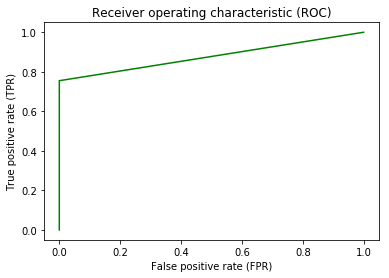

In [32]:
from sklearn.metrics import roc_curve
import matplotlib
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_train, y_pred)
auc = np.trapz(fpr,tpr)
print('Area under the ROC curve: ' + str(auc))
 
fig = plt.figure(1)
plt.plot(fpr,tpr,color='green')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')

#### 4. Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()

DT_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
y_pred = DT_model.predict(X_train)
pd.crosstab(y_train, y_pred)

col_0,0,1
Delayed,,
0,1931795,0
1,0,533659


In [37]:
accuracy_score(y_train, y_pred)

1.0

In [38]:
temp_DF.loc[1, 'Model']  = "Decision tree"
temp_DF.loc[1, 'Accuracy'] = accuracy_score(y_train, y_pred)
temp_DF.loc[1, "Precision"] = precision_score(y_train, y_pred)
temp_DF.loc[1, "Recall"] = recall_score(y_train, y_pred)
Metrics_DF = pd.concat([Metrics_DF, temp_DF], ignore_index=True)

In [39]:
Metrics_DF

,Model,Accuracy,Precision,Recall
0,Logistic regression,0.879782,1,0.444606
1,"KNN, n = 3",0.9501,0.944817,0.817194
2,NB,0.94687,0.999514,0.754913
3,Decision tree,1,1,1


# Thank you